# Libraries

In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [21]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/tamer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tamer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/tamer/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tamer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/tamer/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /home/tamer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stopwords

In [4]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
stopwords.words('turkish')

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [2]:
df = pd.read_csv('bbc_text_cls.csv')
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [6]:
df['text'][0]

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [4]:
df['labels'].value_counts()

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [3]:
inputs = df['text']
labels = df['labels']

<Axes: >

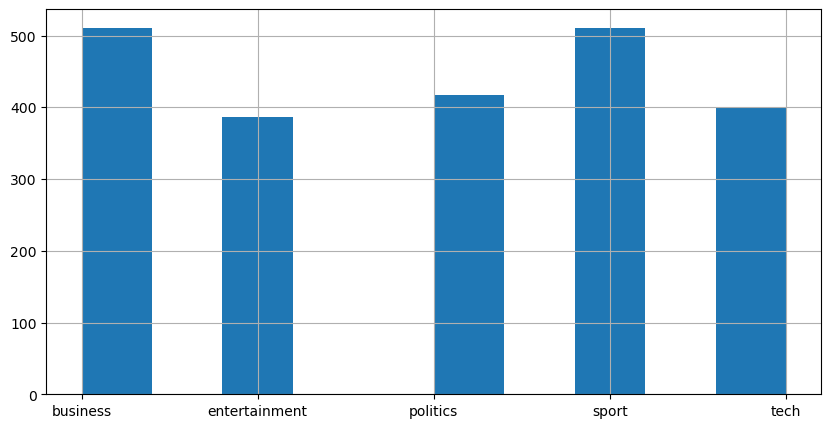

In [6]:
labels.hist(figsize=(10,5))

In [4]:
inputs_train, inputs_test, ytrain, ytest = train_test_split(inputs, labels, test_size=0.2, random_state=123)

In [6]:
inputs_train

1983    Halo 2 sells five million copies\n\nMicrosoft ...
878     Briton wins short film Oscar\n\nThree of the f...
94      Profits slide at India's Dr Reddy\n\nProfits a...
1808    Philippoussis doubt over Open bid\n\nMark Phil...
1742    Hantuchova in Dubai last eight\n\nDaniela Hant...
                              ...                        
1147    Blair 'said he would stand down'\n\nTony Blair...
2154    IBM puts cash behind Linux push\n\nIBM is spen...
1766    Hingis hints at playing comeback\n\nMartina Hi...
1122    Clarke faces ID cards rebellion\n\nCharles Cla...
1346    Athens memories soar above lows\n\nWell, it's ...
Name: text, Length: 1780, dtype: object

In [9]:
ytrain

1983             tech
878     entertainment
94           business
1808            sport
1742            sport
            ...      
1147         politics
2154             tech
1766            sport
1122         politics
1346            sport
Name: labels, Length: 1780, dtype: object

In [10]:
type(ytrain)

pandas.core.series.Series

# Understand how `CountVectorizer()` works

In [29]:
vectorizer = CountVectorizer()

In [30]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [31]:
Xtrain

<1780x26930 sparse matrix of type '<class 'numpy.int64'>'
	with 359094 stored elements in Compressed Sparse Row format>

In [10]:
# get the dense form of the matrix
Xtrain_dense = Xtrain.todense()
Xtrain_dense

matrix([[0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 2, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [15]:
Xtrain_dense.shape

(1780, 26930)

In [16]:
(Xtrain != 0).sum()

359094

In [17]:
(Xtrain_dense != 0).sum()

359094

In [18]:
# what percentage of values are non-zero?
(Xtrain != 0).sum()/np.prod(Xtrain.shape)

0.0074912069159744155

In [11]:
Xtrain_array = Xtrain.toarray()
Xtrain_array

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
type(Xtrain_dense)

numpy.matrix

In [20]:
type(Xtrain_array)

numpy.ndarray

In [27]:
df_features = pd.DataFrame(data=Xtrain_array, columns=vectorizer.get_feature_names_out())
df_features

,00,000,000bn,000m,000s,000th,004,007,01,0100,...,zone,zonealarm,zones,zoom,zooms,zooropa,zuluaga,zurich,zvonareva,zvyagintsev
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_features[['business', 'finance', 'recession', 'interest', 'economy']]

,business,finance,recession,interest,economy
0,0,0,0,0,0
1,0,0,0,0,0
2,2,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1775,0,0,0,0,0
1776,1,0,0,0,0
1777,0,0,0,0,0
1778,1,0,0,0,0


In [32]:
df_features.eq(0)

,00,000,000bn,000m,000s,000th,004,007,01,0100,...,zone,zonealarm,zones,zoom,zooms,zooropa,zuluaga,zurich,zvonareva,zvyagintsev
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1776,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1777,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1778,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [30]:
df_features.eq(0).any()

00             True
000            True
000bn          True
000m           True
000s           True
               ... 
zooropa        True
zuluaga        True
zurich         True
zvonareva      True
zvyagintsev    True
Length: 26930, dtype: bool

In [33]:
df_features.eq(0).all()

00             False
000            False
000bn          False
000m           False
000s           False
               ...  
zooropa        False
zuluaga        False
zurich         False
zvonareva      False
zvyagintsev    False
Length: 26930, dtype: bool

In [28]:
# Select columns with all values zero
zero_columns = df_features.columns[df_features.eq(0).all()]
zero_columns

Index([], dtype='object')

# ML for predicting type of news
## Multinomial Naive Bayes

In [32]:
model = MultinomialNB()
model.fit(Xtrain, ytrain)
print("train_score:", model.score(Xtrain, ytrain))
print("test_score:", model.score(Xtest, ytest))

train_score: 0.9921348314606742
test_score: 0.9685393258426966


## exclude stop words

In [33]:
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtrain

<1780x26638 sparse matrix of type '<class 'numpy.int64'>'
	with 257576 stored elements in Compressed Sparse Row format>

In [34]:
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, ytrain)
print("train_score:", model.score(Xtrain, ytrain))
print("test_score:", model.score(Xtest, ytest))

train_score: 0.9932584269662922
test_score: 0.9730337078651685


In [35]:
Xtest

<445x26638 sparse matrix of type '<class 'numpy.int64'>'
	with 61868 stored elements in Compressed Sparse Row format>

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

## using lemmatization

In [12]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [13]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [36]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, ytrain)
print("train_score:", model.score(Xtrain, ytrain))
print("test_score:", model.score(Xtest, ytest))

/home/tamer/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train_score: 0.9921348314606742
test_score: 0.9662921348314607


In [37]:
Xtrain

<1780x26620 sparse matrix of type '<class 'numpy.int64'>'
	with 348910 stored elements in Compressed Sparse Row format>

## using stemming

In [23]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [38]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, ytrain)
print("train_score:", model.score(Xtrain, ytrain))
print("test_score:", model.score(Xtest, ytest))

/home/tamer/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train_score: 0.9893258426966293
test_score: 0.9685393258426966


In [39]:
Xtrain

<1780x23365 sparse matrix of type '<class 'numpy.int64'>'
	with 356772 stored elements in Compressed Sparse Row format>

## using a simple tokenizer (with string `.split()`)

In [26]:
def simple_tokenizer(s):
    return s.split()

In [40]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, ytrain)
print("train_score:", model.score(Xtrain, ytrain))
print("test_score:", model.score(Xtest, ytest))

/home/tamer/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train_score: 0.9955056179775281
test_score: 0.9707865168539326


In [41]:
Xtrain

<1780x53824 sparse matrix of type '<class 'numpy.int64'>'
	with 392752 stored elements in Compressed Sparse Row format>

What is the vector dimensionality in each case? (hint: print the size of the `Xtrain`)

Compare them and consider why they are larger/smaller.